In [1]:
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv('songs_normalize.csv')
df = df[df['popularity'] != 0] # Removing popularity scores equal to zero

# Convert types if needed
df['explicit'] = df['explicit'].astype(bool)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df.dropna(subset=['year', 'popularity', 'duration_ms'], inplace=True)

# Add "has_feature" column
feature_keywords = ['feat', 'with', 'featuring', 'feat.', '&', 'vs', ' x']
df['has_feature'] = df['song'].str.contains('|'.join(feature_keywords), case=False, regex=True)

# Add "is_edited" column
edit_keywords = ['radio', 'remix', 'version', 'edit', 'mix', 'remaster', 'video', 'explicit', 'from', 'interlude', 'personal', '\\*']
df['is_edited'] = df['song'].str.contains('|'.join(edit_keywords), case=False, regex=True)


In [2]:
fig1 = px.scatter(
    df,
    x='duration_ms',
    y='popularity',
    color='year',
    title='Are Shorter Songs More Popular?',
    labels={'duration_ms': 'Duration (ms)', 'popularity': 'Popularity'}
)
fig1.show()


In [3]:
explicit_trend = df.groupby(['year', 'explicit'])['popularity'].mean().reset_index()
fig2 = px.line(
    explicit_trend,
    x='year',
    y='popularity',
    color='explicit',
    markers=True,
    title='Popularity of Explicit vs Non-Explicit Songs Over Time',
    labels={'popularity': 'Average Popularity'}
)
fig2.show()


In [4]:
feat_pop = df.groupby('has_feature')['popularity'].mean().reset_index()
fig3 = px.bar(
    feat_pop,
    x='has_feature',
    y='popularity',
    title='Average Popularity: Songs With vs Without Featured Artists',
    labels={'has_feature': 'Has Featured Artist', 'popularity': 'Average Popularity'}
)
fig3.show()


In [5]:
edit_pop = df.groupby('is_edited')['popularity'].mean().reset_index()
fig4 = px.bar(
    edit_pop,
    x='is_edited',
    y='popularity',
    title='Average Popularity: Edited vs Original Songs',
    labels={'is_edited': 'Is Edited/Remixed', 'popularity': 'Average Popularity'}
)
fig4.show()


In [6]:
duration_by_year = df.groupby('year')['duration_ms'].mean().reset_index()
fig5 = px.line(
    duration_by_year,
    x='year',
    y='duration_ms',
    title='Average Song Duration Over Time',
    labels={'duration_ms': 'Average Duration (ms)'}
)
fig5.show()


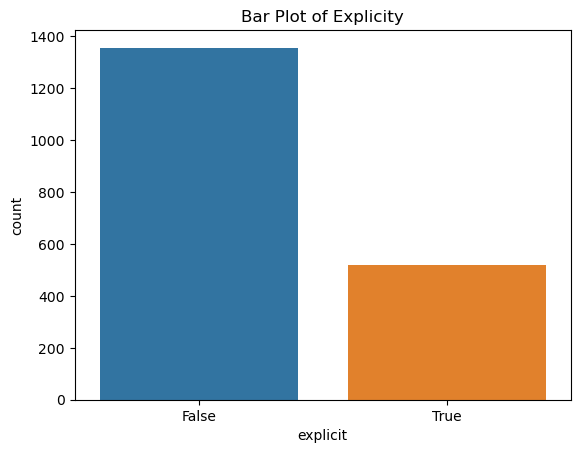

In [7]:
# Analysing the categorical variables of mode and explicitly
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(data = df, x = 'explicit', hue = 'explicit', legend = False)
plt.title('Bar Plot of Explicity')
plt.show()

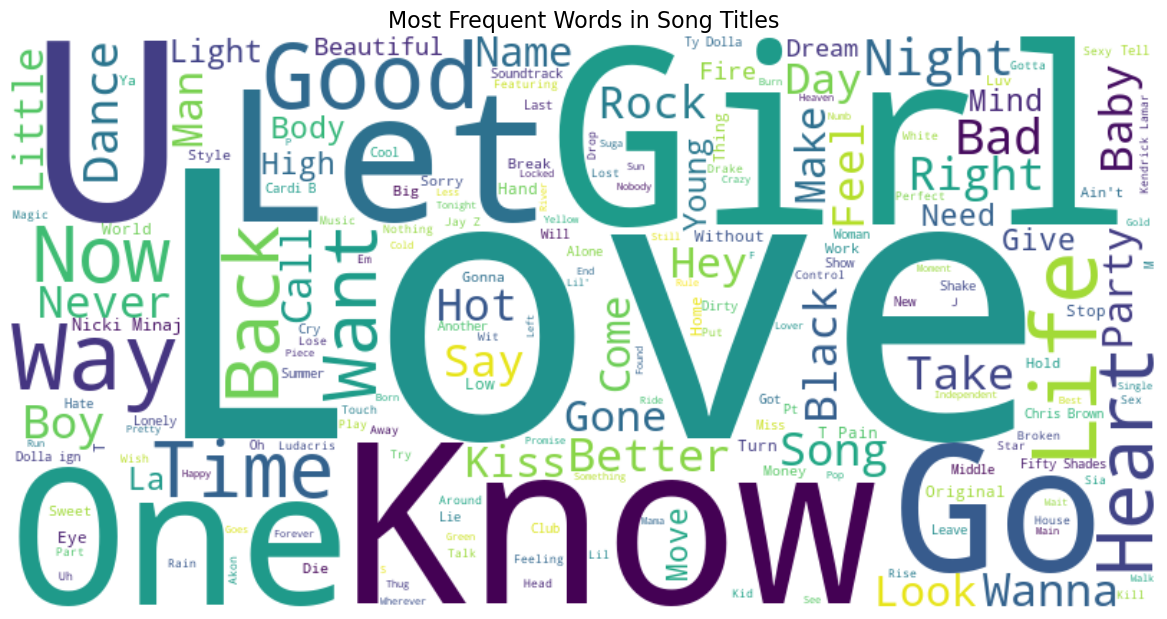

In [8]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('songs_normalize.csv')

# Combine all song titles into one string
all_titles = ' '.join(df['song'].dropna().astype(str))

# Optional: Add custom stopwords relevant to music
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'feat', 'remix', 'edit', 'version', 'explicit', 'radio', 'official',
    'video', 'live', 'mix', 'vs', 'x', 'with', 'from', 'interlude', 'personal', '*'
])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=custom_stopwords,
    collocations=True
).generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Song Titles', fontsize=16)
plt.tight_layout(pad=0)
plt.show()


# Helped to identify terms that are most popular.

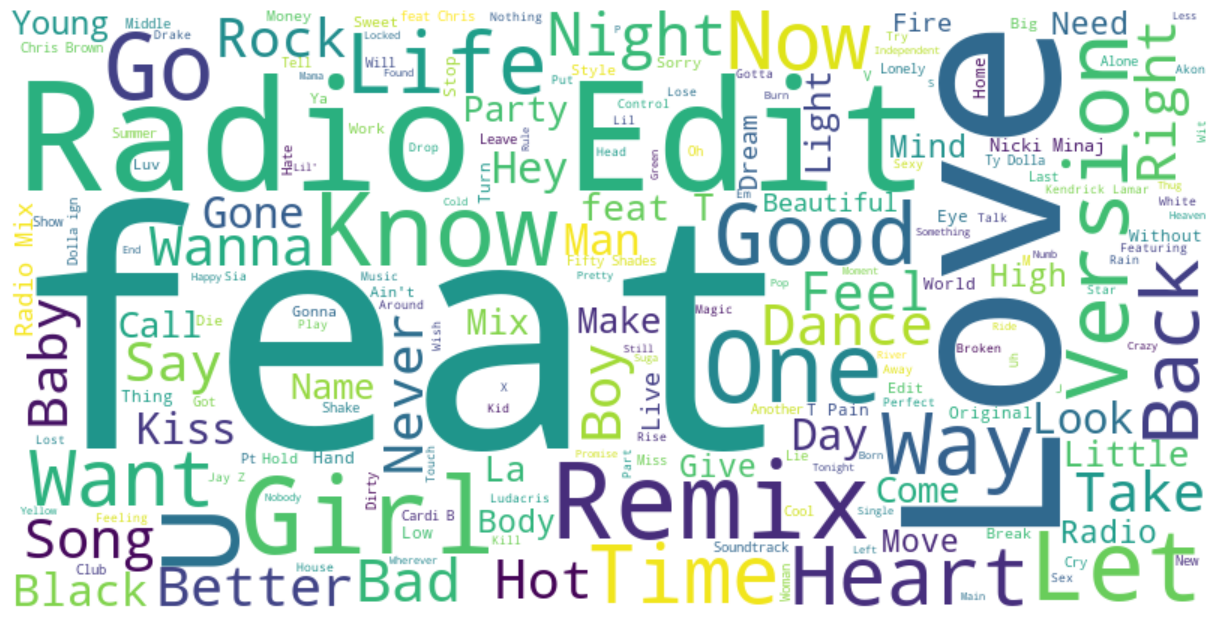

In [9]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('songs_normalize.csv')

# Combine all song titles into one string
all_titles = ' '.join(df['song'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    # stopwords=custom_stopwords,
    collocations=True
).generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Frequent Words in Song Titles', fontsize=16)
plt.tight_layout(pad=0)
plt.show()


# Identified terms used to denote feauturing artist and terms used to denote whether or not a song has a edited version. 

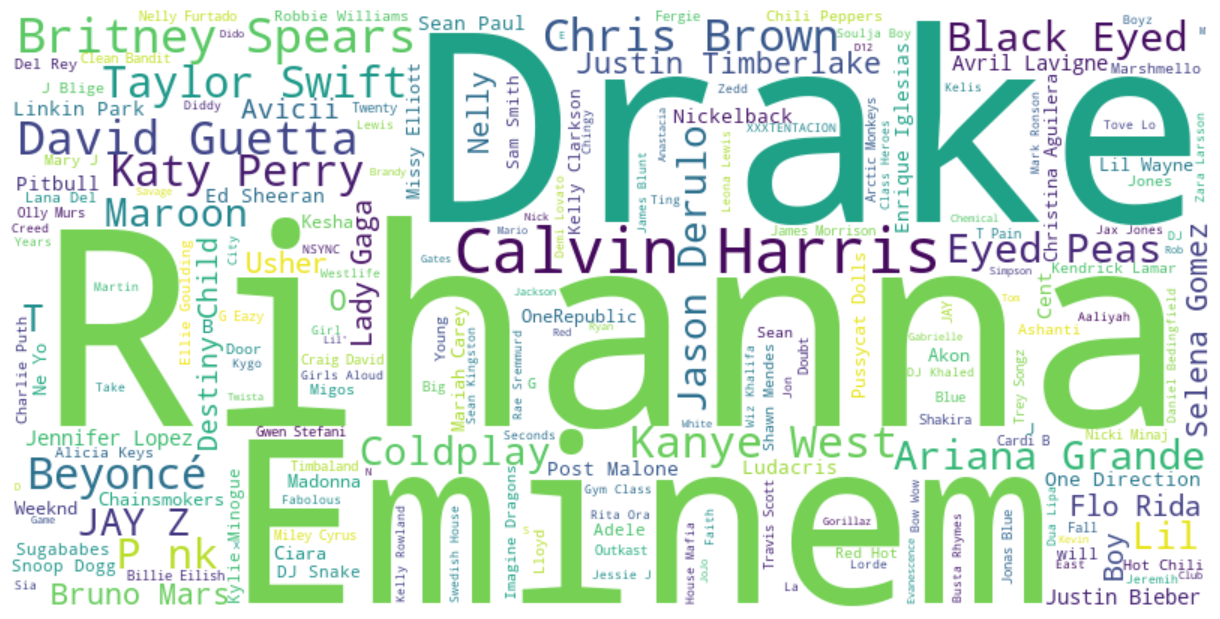

In [10]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('songs_normalize.csv')

# Combine all song titles into one string
all_titles = ' '.join(df['artist'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    # stopwords=custom_stopwords,
    collocations=True
).generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Most Frequent Words in Song Titles', fontsize=16)
plt.tight_layout(pad=0)
plt.show()


# Helped to identify the most common artists.